Pixeltests School Data Science

*Unit 2, Sprint 2, Module 1*

---

In [61]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/pixeltests/datasets/main/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*
    
# If you're working locally:
else:
    DATA_PATH = '../data/'

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Module Project: Decision Trees

This week, the module projects will focus on creating and improving a model for the Tanazania Water Pump dataset. Your goal is to create a model to predict whether a water pump is functional, non-functional, or needs repair.

Dataset source: [DrivenData.org](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/).

## Directions

The tasks for this project are as follows:

- **Task 1:** Enter the [Kaggle](https://www.kaggle.com/t/6169ee7701164d24943c98eda2de9b5e) competition using exactly this link!
- **Task 2:** Use `wrangle` function to import training and test data.
- **Task 3:** Split training data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline accuracy score for your dataset.
- **Task 6:** Build and train `model_dt`.
- **Task 7:** Calculate the training and validation accuracy score for your model.
- **Task 8:** Adjust model's `max_depth` to reduce overfitting.
- **Task 9 `stretch goal`:** Create a horizontal bar chart showing the 10 most important features for your model.

You should limit yourself to the following libraries for this project:

- `category_encoders`
- `matplotlib`
- `pandas`
- `pandas-profiling`
- `sklearn`

# Kaggle

**Task 1:** Enter the [Kaggle](https://www.kaggle.com/t/6169ee7701164d24943c98eda2de9b5e) competition using exactly this link! **We recommend that you choose a username that's based on your name, since you might include it in your resume in the future.**. Go to the **Rules** page. Accept the rules of the competition. Notice that the **Rules** page also has instructions for the Submission process. The **Data** page has feature definitions.

# I. Wrangle Data

In [68]:
def wrangle(fm_path, tv_path=None):
    if tv_path:
        df = pd.merge(pd.read_csv(fm_path, 
                                  na_values=[0, -2.000000e-08]),
                      pd.read_csv(tv_path)).set_index('id')
    else:
        df = pd.read_csv(fm_path, 
                         na_values=[0, -2.000000e-08],
                         index_col='id')

    # Drop constant columns
    df.drop(columns=['recorded_by'], inplace=True)

    # Drop HCCCs
    cutoff = 100
    drop_cols = [col for col in df.select_dtypes('object').columns
                 if df[col].nunique() > cutoff]
    df.drop(columns=drop_cols, inplace=True)

    # Drop duplicate columns
    dupe_cols = [col for col in df.head(15).T.duplicated().index
                 if df.head(15).T.duplicated()[col]]
    df.drop(columns=dupe_cols, inplace=True)             

    return df

In [63]:
train_labels_path='/content/drive/MyDrive/Colab Notebooks/train_labels.csv'
train_features_path='/content/drive/MyDrive/Colab Notebooks/train_features.csv'

**Task 1:** Using the `wrangle` function above, read the `train_features.csv` and  `train_labels.csv` files into the DataFrame `df`. Next, use the same function to read the test set `test_features.csv` into the DataFrame `X_test`.

In [69]:
import pandas as pd
df_labels = pd.read_csv(train_labels_path)
#print(df_features.shape,df_labels.shape)
#df_labels.head()
df=wrangle(train_features_path)

In [73]:
X_test = wrangle('/content/drive/MyDrive/Colab Notebooks/test_features.csv')

(11880, 29)

# II. Split Data

**Task 3:** Split your DataFrame `df` into a feature matrix `X` and the target vector `y`. You want to predict `'status_group'`.

In [80]:
X = df
y = df_labels
print(y.shape)
print(X.shape)

(47520, 1)
(47520, 29)


**Task 4:** Using a randomized split, divide `X` and `y` into a training set (`X_train`, `y_train`) and a validation set (`X_val`, `y_val`).

In [121]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,train_size=0.80, test_size=0.20,random_state=42)
print(y_train.shape)
y_val=y_val['status_group']
print(y_val.shape)

(38016, 1)
(9504,)


# III. Establish Baseline

**Task 5:** Since this is a **classification** problem, you should establish a baseline accuracy score. Figure out what is the majority class in `y_train` and what percentage of your training observations it represents.

In [122]:
import numpy as np
l = np.zeros(len(X_test),dtype=int)
l= pd.DataFrame(l)
path_sample ='/content/drive/MyDrive/Colab Notebooks/tanzania sample solution.csv'
sample = pd.read_csv(path_sample)
sample.head()

,S.No.,status_group
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [92]:
submission = sample[['S.No.']].copy() #get the id and the prediction 
submission['status_group'] = l
submission.to_csv('tanzania-baseline-submission-01.csv', index=False)


In [94]:
baseline_acc = 0.50
print('Baseline Accuracy Score:', baseline_acc)

Baseline Accuracy Score: 0.5


# IV. Build Model

**Task 6:** Build a `Pipeline` named `model_dt`, and fit it to your training data. Your `Pipeline` should include:

- an `OrdinalEncoder` transformer for categorical features.
- a `SimpleImputer` transformer fot missing values.
- a `DecisionTreeClassifier` predictor.

**Note:** Don't forget to set the `random_state` parameter for your `DecisionTreeClassifier`.

In [128]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
model_dt =  make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='mean'), 
    DecisionTreeClassifier(random_state=91)
    )
#fit on train
model_dt.fit(X_train, y_train)

y_pred1 = model_dt.predict(X_train)
y_pred2 = model_dt.predict(X_val)
print(y_pred2.shape,y_val.shape)
print(y_pred1.shape,y_train.shape)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


(9504,) (9504,)
(38016,) (38016, 1)


# V. Check Metrics

**Task 7:** Calculate the training and validation accuracy scores for `model_dt`.

In [129]:
from sklearn.metrics import accuracy_score
training_acc = accuracy_score(y_pred1,y_train)
val_acc = accuracy_score(y_pred2,y_val)

print('Training Accuracy Score:', training_acc)
print('Validation Accuracy Score:', val_acc)

Training Accuracy Score: 0.9957123316498316
Validation Accuracy Score: 0.7475799663299664


# VI. Tune Model

**Task 8:** Is there a large difference between your training and validation accuracy? If so, experiment with different setting for `max_depth` in your `DecisionTreeClassifier` to reduce the amount of overfitting in your model.

In [146]:
model_dt1 =  make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='median'), 
    DecisionTreeClassifier(random_state=33,max_depth=23)
    )
#fit on train
model_dt1.fit(X_train, y_train)
print('Training Accuracy Score:',  model_dt1.score(X_train,y_train))
print('Validation Accuracy Score:',model_dt1.score(X_val,y_val))
y_pred1 = model_dt1.predict(X_test)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Training Accuracy Score: 0.9367897727272727
Validation Accuracy Score: 0.7593644781144782


In [143]:
y_pred1
for i in range(len(y_pred1)):
  if y_pred1[i] == 'functional':
    y_pred1[i]='0'
  elif y_pred1[i]== 'functional needs repair':
    y_pred1[i]='1'
  else:
    y_pred1[i]='2'
submission = sample[['S.No.']].copy() #get the id and the prediction 
submission['status_group'] = y_pred1
submission.to_csv('tanzania-submission-07.csv', index=False)

# VII. Communicate Results

**Task 9 `stretch goal`:** Create a horizontal barchart that shows the the 10 most important features for model_dt, sorted by value.

**Note:** [`DecisionTreeClassifier.feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreecla#sklearn.tree.DecisionTreeClassifier.feature_importances_) returns values that are different from [`LogisticRegression.coef_`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). All the values will be positive, and they will sum to `1`.

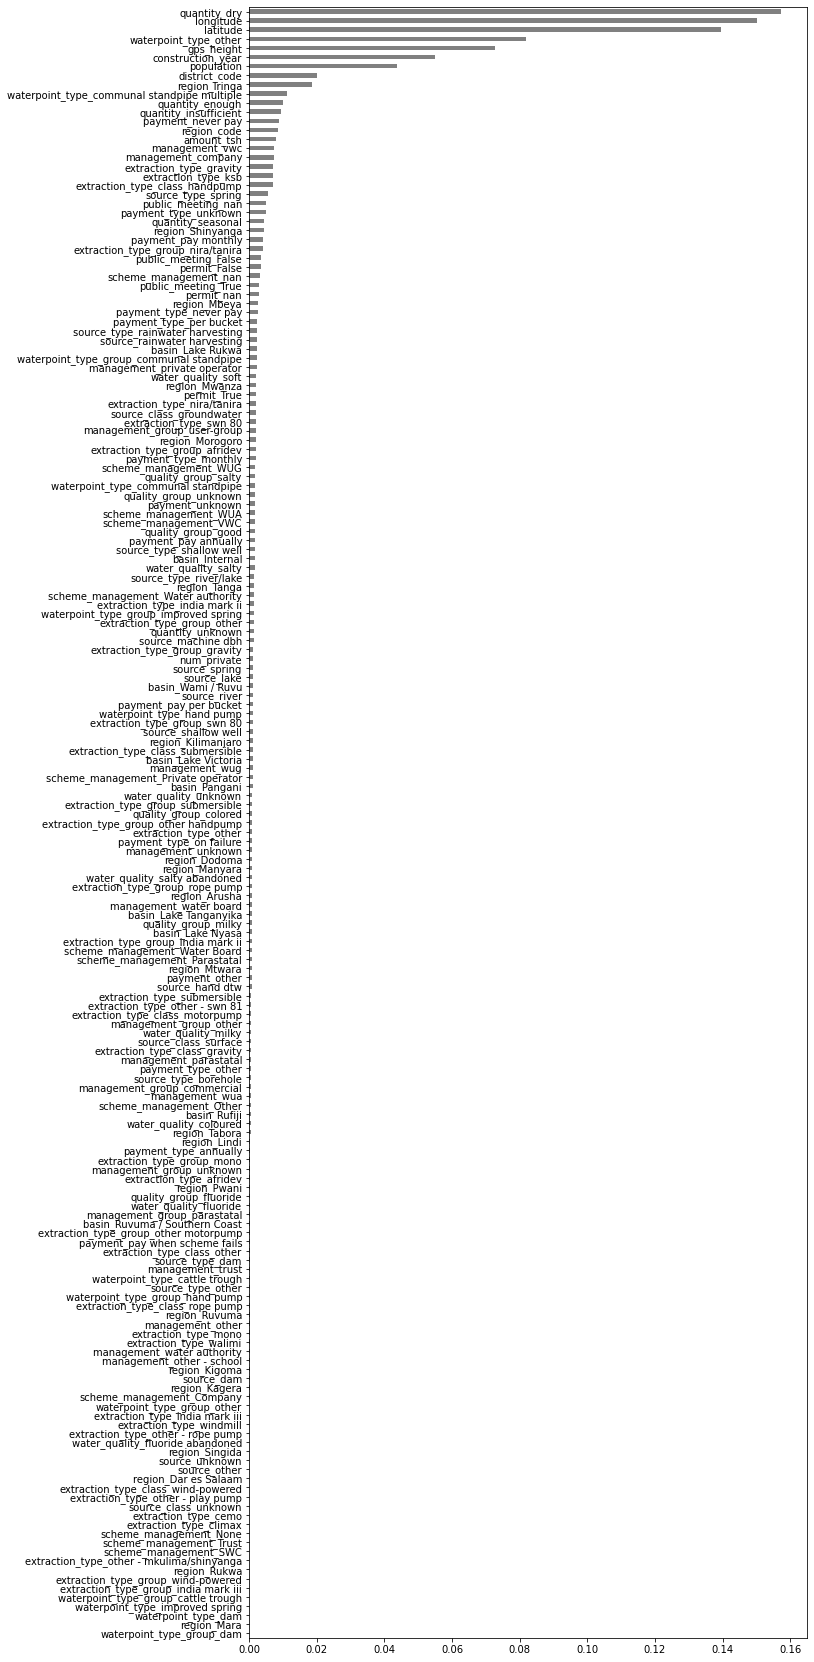

In [152]:
%matplotlib inline
import matplotlib.pyplot as plt

model = model_dt1.named_steps['decisiontreeclassifier']
encoder = model_dt1.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns
coefficients = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize=(10,30))
coefficients.sort_values().plot.barh(color='grey');